In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import pickle
import json

# Problem Statment

In [2]:
To find out the medical charges by using supervised machine learning Linear Regression algorithm

SyntaxError: invalid syntax (83112945.py, line 1)

# Data Gathering

In [4]:
# Loading the dataset
medical=pd.read_csv('medical_insurance.csv')
medical

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Exploratory Data Analysis

In [5]:
Based on the data set we can conclude here that charges coloumn is our target column

SyntaxError: invalid syntax (827444776.py, line 1)

In [6]:
# Finding total rows and column
medical.shape

(1338, 7)

In [7]:
# Finding the null value in the data set
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null value in the data set

In [8]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Checking for the unique value

In [9]:
medical['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [10]:
medical['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
medical['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [12]:
medical['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [13]:
medical['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [14]:
medical['region'].unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
medical['region'].unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
medical['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

# checking value counts

In [17]:
medical['age'].value_counts()


18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [18]:
medical['sex'].value_counts()


male      676
female    662
Name: sex, dtype: int64

In [19]:
medical['bmi'].value_counts()


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [20]:
medical['children'].value_counts()


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [21]:
medical['charges'].value_counts()


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [22]:
x=medical['age'].sort_values(ascending=False)
x





335     64
603     64
752     64
1265    64
534     64
        ..
942     18
46      18
295     18
50      18
648     18
Name: age, Length: 1338, dtype: int64

In [23]:
medical

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Encoding

In [24]:
# Catagorical data hence performing labelled encoding
medical['sex'].value_counts().to_dict()
sex_value={'male': 1, 'female': 0}

In [25]:
# Catagorical data hence performing labelled encoding

medical['sex'].replace({'male': 1, 'female': 0},inplace=True)
medical

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [26]:
# Column havig nominal data so perform onehot_encoding
medical=pd.get_dummies(medical,columns=['region'])
medical

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,yes,16884.92400,0,0,0,1
1,18,1,33.770,1,no,1725.55230,0,0,1,0
2,28,1,33.000,3,no,4449.46200,0,0,1,0
3,33,1,22.705,0,no,21984.47061,0,1,0,0
4,32,1,28.880,0,no,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,10600.54830,0,1,0,0
1334,18,0,31.920,0,no,2205.98080,1,0,0,0
1335,18,0,36.850,0,no,1629.83350,0,0,1,0
1336,21,0,25.800,0,no,2007.94500,0,0,0,1


In [27]:
medical['smoker'].value_counts().to_dict()
smoker_value={'no': 0, 'yes': 1}


In [28]:
medical['smoker'].replace({'no': 0, 'yes': 1},inplace=True)
medical

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


# Changing DataType

In [29]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


# Feature Engineering

In [30]:
#Finding missing values
medical.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

<AxesSubplot: >

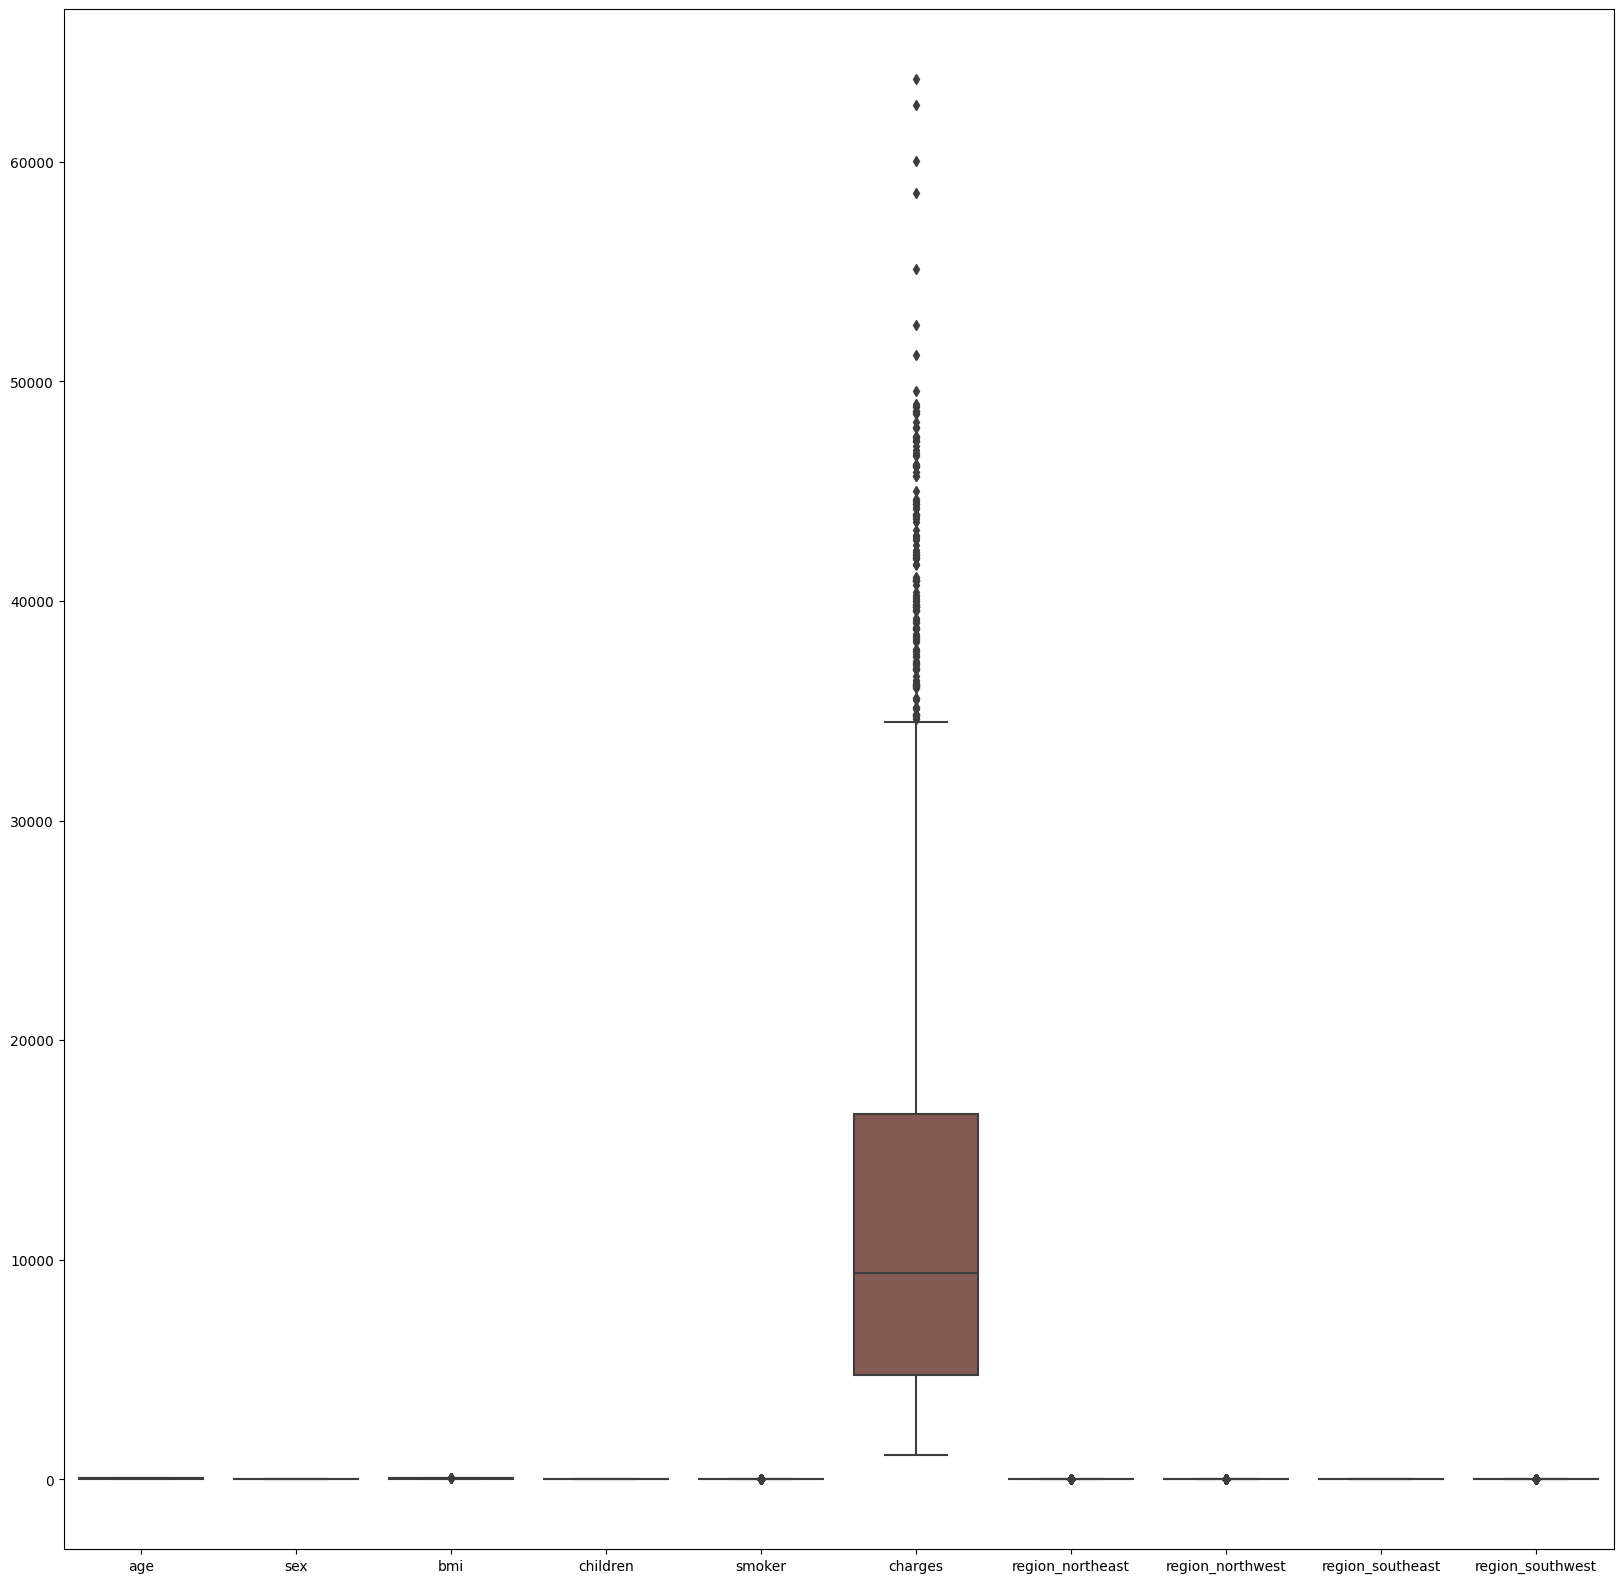

In [31]:
# Finding outlier
plt.figure(figsize=(20,20))
sns.boxplot(medical)

1.charges_column

<AxesSubplot: >

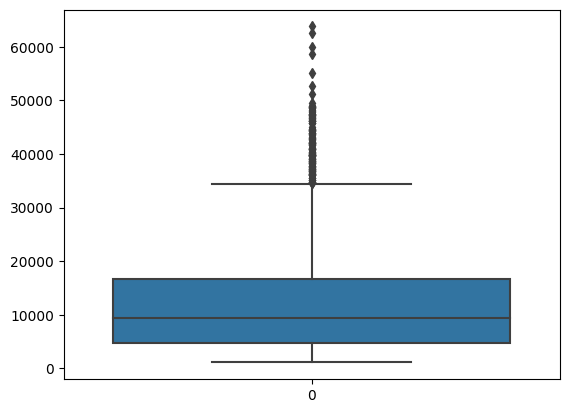

In [32]:
sns.boxplot(medical['charges'])

In [33]:
# charges_column
q1=medical['charges'].quantile(0.25)
q2=medical['charges'].quantile(0.50)
q3=medical['charges'].quantile(0.75)

iqr=q3-q1

uppertail_charges=q3+1.5*iqr
# No outlier in the lowetail
print('q1=',q1)
print('q2=',q2)
print('q2=',q2)
print('iqr=',iqr)
print('uppertail_charges=',uppertail_charges)



q1= 4740.28715
q2= 9382.033
q2= 9382.033
iqr= 11899.625365
uppertail_charges= 34489.350562499996


In [34]:
median_value=medical['charges'].median()

In [35]:
medical['charges'].loc[(medical['charges'])>uppertail_charges]

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64

In [36]:
#Assign value more than the uppertail
medical.loc[(medical['charges'])>uppertail_charges,'charges']=uppertail_charges


In [37]:
# Now there is no value more than the uppertail
medical['charges'].loc[(medical['charges'])>uppertail_charges]


Series([], Name: charges, dtype: float64)

In [38]:
medical['charges'].max()

34489.350562499996

<AxesSubplot: >

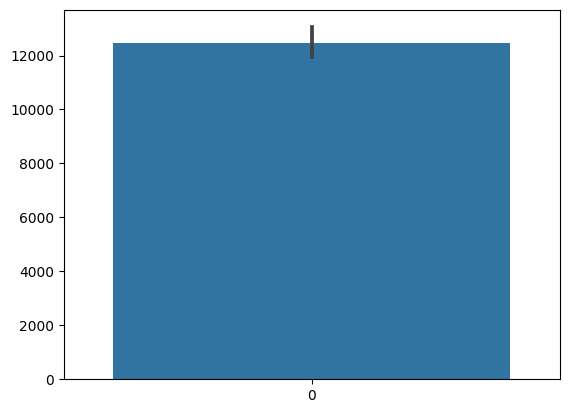

In [39]:
sns.barplot(medical['charges'])

2.bmi_column

<AxesSubplot: >

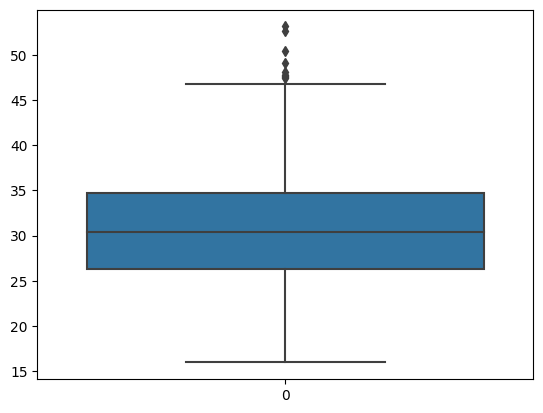

In [40]:
sns.boxplot(medical['bmi'])

In [41]:
q1=medical['bmi'].quantile(0.25)
q2=medical['bmi'].quantile(0.50)
q3=medical['bmi'].quantile(0.75)

iqr=q3-q1

uppertail_bmi=q3+1.5*iqr
# No outlier in the lowetail
print('q1=',q1)
print('q2=',q2)
print('q2=',q2)
print('iqr=',iqr)
print('uppertail_bmi=',uppertail_bmi)


q1= 26.29625
q2= 30.4
q2= 30.4
iqr= 8.3975
uppertail_bmi= 47.290000000000006


In [42]:
median_value=medical['bmi'].median()

In [43]:
medical.loc[(medical['bmi']>uppertail_bmi),'bmi']=uppertail_bmi

In [44]:
medical.loc[(medical['bmi']>uppertail_bmi),'bmi']

Series([], Name: bmi, dtype: float64)

<AxesSubplot: >

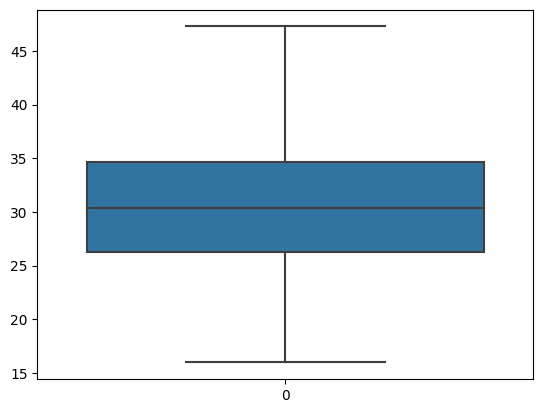

In [45]:
sns.boxplot(medical['bmi'])

In [46]:
medical['bmi'].loc[(medical['bmi']>uppertail_bmi)]

Series([], Name: bmi, dtype: float64)

Smoker_column

<AxesSubplot: >

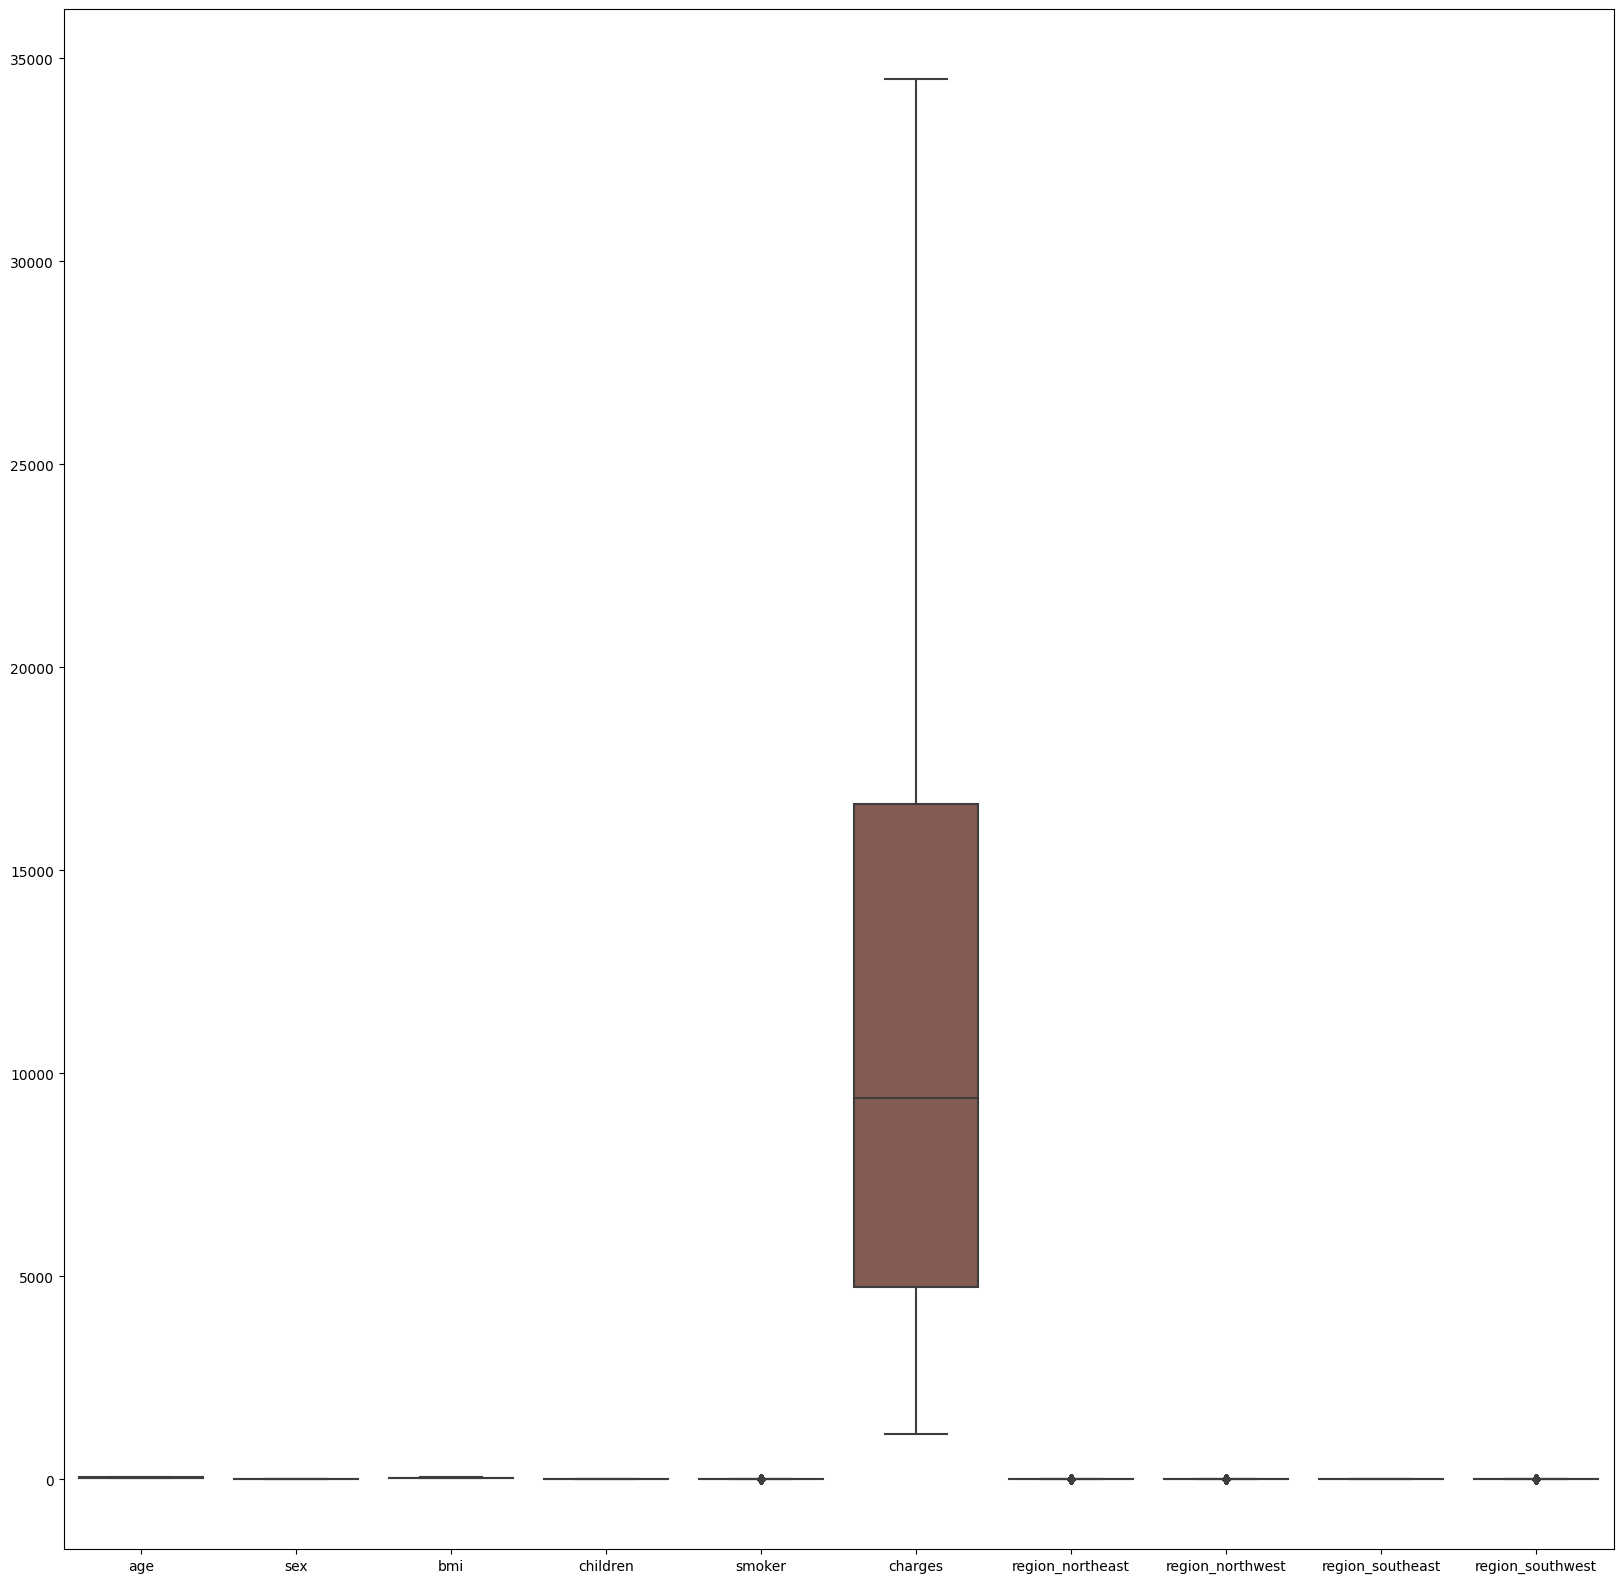

In [47]:
plt.figure(figsize=(20,20))
sns.boxplot(medical)

In [48]:
x=medical.drop(columns='charges')
y=medical['charges']
x


,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 9)
(268, 9)
(1070,)
(268,)


In [51]:
# Create instance of model
model=LinearRegression()

In [52]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [53]:
#Model Training
model=model.fit(x_train,y_train)
model

LinearRegression()

Model Evaluation

In [54]:
# Training accuracy
y_train_pred=model.predict(x_train)
#residual=(y_train-y_train_pred)
MSE=mean_squared_error(y_train,y_train_pred)
RMSE=np.sqrt(MSE) 
MAE=mean_squared_error(y_train,y_train_pred)
r2_score_value=r2_score(y_train,y_train_pred)
adj_r2_socre=1-(((1-r2_score_value)*(x_train.shape[0]-1))/((x_train.shape[0]-x_train.shape[1]-1)))   
#print('residual=',residual)
print('MSE=',MSE)
print('RMSE=',RMSE)
print('MAE=',MAE)
print('r2_score_value=',r2_score_value)
print('adj_r2_socre=',adj_r2_socre)







MSE= 26220146.763916302
RMSE= 5120.561176659869
MAE= 26220146.763916302
r2_score_value= 0.7516289464679635
adj_r2_socre= 0.7495201356360877


In [55]:
# Testing accuracy
y_test_pred=model.predict(x_test)
#residual=(y_train-y_train_pred)
MSE=mean_squared_error(y_test,y_test_pred)
RMSE=np.sqrt(MSE) 
MAE=mean_squared_error(y_test,y_test_pred)
r2_score_value=r2_score(y_test,y_test_pred)
adj_r2_socre=1-(((1-r2_score_value)*(x_test.shape[0]-1))/((x_test.shape[0]-x_test.shape[1]-1)))   
#print('residual=',residual)
print('MSE=',MSE)
print('RMSE=',RMSE)
print('MAE=',MAE)
print('r2_score_value=',r2_score_value)
print('adj_r2_socre=',adj_r2_socre)







MSE= 25320328.060148735
RMSE= 5031.930848108779
MAE= 25320328.060148735
r2_score_value= 0.728360648775938
adj_r2_socre= 0.7188848574541684


# Overfitting Happens

To reduce overfitting performing ridge and lasso regression,hypertunning(GrideSearchCV,RandomisedCV)

# Ridge Regression

In [56]:
ridge_reg_model=Ridge(alpha=0.1)
ridge_reg_model.fit(x_train,y_train)

Ridge(alpha=0.1)

In [57]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [58]:
medical['bmi']=medical['bmi'].astype(int)

In [59]:
medical['charges']=medical['charges'].astype(int)


In [60]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               1338 non-null   int64
 1   sex               1338 non-null   int64
 2   bmi               1338 non-null   int32
 3   children          1338 non-null   int64
 4   smoker            1338 non-null   int64
 5   charges           1338 non-null   int32
 6   region_northeast  1338 non-null   uint8
 7   region_northwest  1338 non-null   uint8
 8   region_southeast  1338 non-null   uint8
 9   region_southwest  1338 non-null   uint8
dtypes: int32(2), int64(4), uint8(4)
memory usage: 57.6 KB


In [61]:
#Training accuracy on Ridge regression
y_train_pred=ridge_reg_model.predict(x_train)

MSE=mean_squared_error(y_train,y_train_pred)

RMSE=np.sqrt(MSE)

MAE=mean_absolute_error(y_train,y_train_pred)

R__2=r2_score(y_train,y_train_pred)

adj_r2_score=1-((1-R__2)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))

print("MSE=",MSE)
print("RMSE=",RMSE)
print("MAE=",MAE)
print("r__2=",R__2)
print("adj_r_2_score=",adj_r2_score)

MSE= 26220168.366396725
RMSE= 5120.563286045464
MAE= 3349.638105313984
r__2= 0.75162874183788
adj_r_2_score= 0.749519929268579


In [62]:
#Testing accuracy on Ridge regression

y_test_pred=ridge_reg_model.predict(x_test)

MSE=mean_squared_error(y_test,y_test_pred)

RMSE=np.sqrt(MSE)

MAE=mean_absolute_error(y_test,y_test_pred)

R__2=r2_score(y_test,y_test_pred)

adj_r2_score=1-((1-R__2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

print("MSE=",MSE)
print("RMSE=",RMSE)
print("MAE=",MAE)
print("r__2=",R__2)
print("adj_r_2_score=",adj_r2_score)

MSE= 25317497.720180232
RMSE= 5031.64960228554
MAE= 3258.4992303685235
r__2= 0.7283910129841331
adj_r_2_score= 0.7189162808789284


# Lasso Regression

In [63]:
lasso_reg_model=Lasso(alpha=0.1)
lasso_reg_model.fit(x_test,y_test)

Lasso(alpha=0.1)

In [64]:
# Training accuracy on Lasso regression
y_train_pred=lasso_reg_model.predict(x_train)
#residual=(y_train-y_train_pred)
MSE=mean_squared_error(y_train,y_train_pred)
RMSE=np.sqrt(MSE) 
MAE=mean_squared_error(y_train,y_train_pred)
r2_score_value=r2_score(y_train,y_train_pred)
adj_r2_socre=1-(((1-r2_score_value)*(x_train.shape[0]-1))/((x_train.shape[0]-x_train.shape[1]-1)))   
#print('residual=',residual)
print('MSE=',MSE)
print('RMSE=',RMSE)
print('MAE=',MAE)
print('r2_score_value=',r2_score_value)
print('adj_r2_socre=',adj_r2_socre)







MSE= 27194701.341887306
RMSE= 5214.853913762811
MAE= 27194701.341887306
r2_score_value= 0.7423974517156826
adj_r2_socre= 0.7402102602679855


In [65]:
# Testing accuracy on Lasso regression
y_test_pred=lasso_reg_model.predict(x_test)

MSE=mean_squared_error(y_test,y_test_pred)

RMSE=np.sqrt(MSE)

MAE=mean_absolute_error(y_test,y_test_pred)

R__2=r2_score(y_test,y_test_pred)

adj_r2_score=1-((1-R__2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

print("MSE=",MSE)
print("RMSE=",RMSE)
print("MAE=",MAE)
print("r__2=",R__2)
print("adj_r_2_score=",adj_r2_score)


MSE= 24248930.96588339
RMSE= 4924.320355732696
MAE= 3280.940647001237
r__2= 0.7398547183195169
adj_r_2_score= 0.7307798829120582


In [66]:
with open('linear_model.pkl','wb') as f:
    pickle.dump(lasso_reg_model,f)






In [67]:
print(sex_value)
print(smoker_value)

{'male': 1, 'female': 0}
{'no': 0, 'yes': 1}


In [68]:
column_name=(x.columns)
len(column_name)

9

In [69]:
json_data={'sex':sex_value,
          'smoker':smoker_value,
          "columns":list(column_name)}
json_data

{'sex': {'male': 1, 'female': 0},
 'smoker': {'no': 0, 'yes': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [70]:
with open('project_data.json','w') as f:
    json.dump(json_data,f)

In [71]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               1338 non-null   int64
 1   sex               1338 non-null   int64
 2   bmi               1338 non-null   int32
 3   children          1338 non-null   int64
 4   smoker            1338 non-null   int64
 5   charges           1338 non-null   int32
 6   region_northeast  1338 non-null   uint8
 7   region_northwest  1338 non-null   uint8
 8   region_southeast  1338 non-null   uint8
 9   region_southwest  1338 non-null   uint8
dtypes: int32(2), int64(4), uint8(4)
memory usage: 57.6 KB


# single user input testing 

In [72]:
x.T[0]

age                 19.0
sex                  0.0
bmi                 27.9
children             0.0
smoker               1.0
region_northeast     0.0
region_northwest     0.0
region_southeast     0.0
region_southwest     1.0
Name: 0, dtype: float64

In [73]:
age=19
sex='female'
bmi=27
children=0
smoker='yes'
region='northwest'

region='region_' + region
region
region_index = list(column_name).index(region)
region_index

6

In [127]:
region_index = np.where(column_name == region)[0][0]
region_index

6

In [128]:
x.shape[1]

9

In [129]:
json_data['columns']

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [130]:
column_name

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [131]:
test_array=np.zeros(len(column_name))

test_array[0]=age
test_array[1]=json_data['sex'][sex]
test_array[2]=bmi
test_array[3]=children
test_array[4]=json_data['smoker'][smoker]
test_array[region_index]=1


test_array

array([19.,  0., 27.,  0.,  1.,  0.,  1.,  0.,  0.])

In [132]:
print('test_array==',test_array)

test_array== [19.  0. 27.  0.  1.  0.  1.  0.  0.]


In [133]:
import os

In [134]:
MODEL_FILE_PATH = os.path.join("project_app", "Linear model.pkl")

JSON_FILE_PATH = os.path.join("project_app", "Project_data.json")

In [137]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               1338 non-null   int64
 1   sex               1338 non-null   int64
 2   bmi               1338 non-null   int32
 3   children          1338 non-null   int64
 4   smoker            1338 non-null   int64
 5   charges           1338 non-null   int32
 6   region_northeast  1338 non-null   uint8
 7   region_northwest  1338 non-null   uint8
 8   region_southeast  1338 non-null   uint8
 9   region_southwest  1338 non-null   uint8
dtypes: int32(2), int64(4), uint8(4)
memory usage: 57.6 KB


In [138]:
charges=round(lasso_reg_model.predict([test_array])[0],3)
print('The Predictive Charges Of Medical Insurance:',charges)

The Predictive Charges Of Medical Insurance: 22834.166
